In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/players_21.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/players_21.csv')

print(data.shape)

(18944, 106)


In [ ]:
#data cleaning

data['wage_eur'].fillna('€200K', inplace = True)

In [ ]:
data.fillna(0, inplace = True)


8675.852512668918


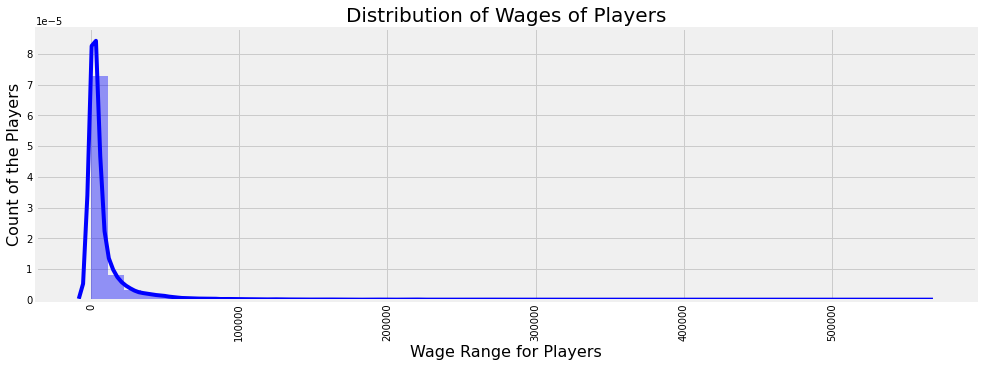

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(data['wage_eur'], color = 'blue')
plt.xlabel('Wage Range for Players', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)
plt.title('Distribution of Wages of Players', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

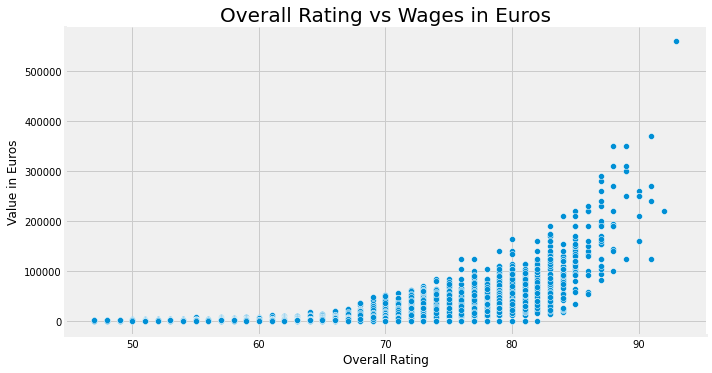

65.67778716216216


In [ ]:
sns.relplot(x='overall',y='wage_eur',palette = 'blues', sizes=(15, 200),aspect=2,data=data)
plt.title('Overall Rating vs Wages in Euros',fontsize = 20)
plt.xlabel('Overall Rating')
plt.ylabel('Value in Euros')
plt.show()
# print(data['overall'].mean())

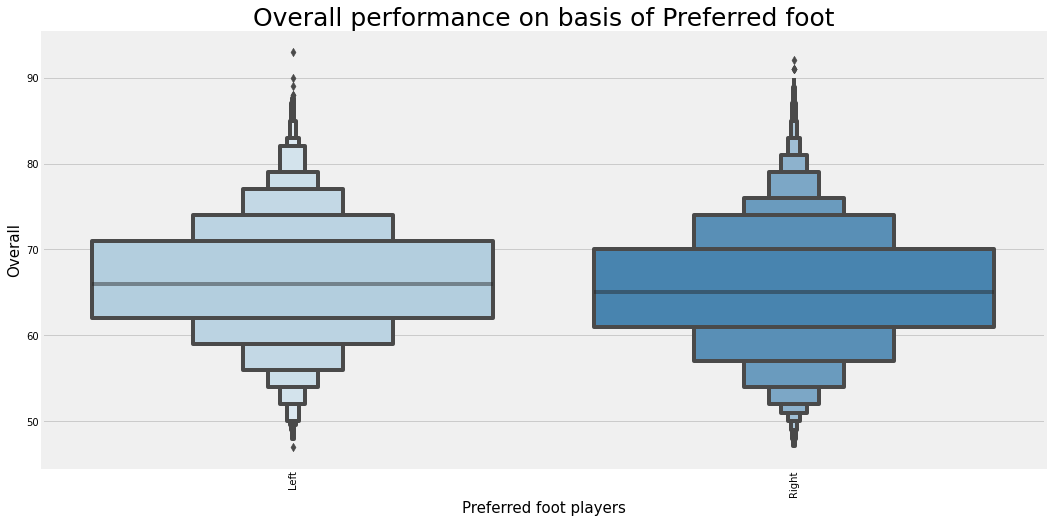

In [ ]:
foots = ('Right', 'Left')

foot_pref= data.loc[data['preferred_foot'].isin(foots)]
plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxenplot(x = foot_pref['preferred_foot'], y = 'overall', data = foot_pref, palette = 'Blues')
ax.set_xlabel(xlabel = 'Preferred foot players', fontsize = 15)
ax.set_ylabel(ylabel = 'Overall', fontsize = 15)
ax.set_title(label = 'Overall performance on basis of Preferred foot', fontsize = 25)
plt.xticks(rotation = 90)
plt.show()


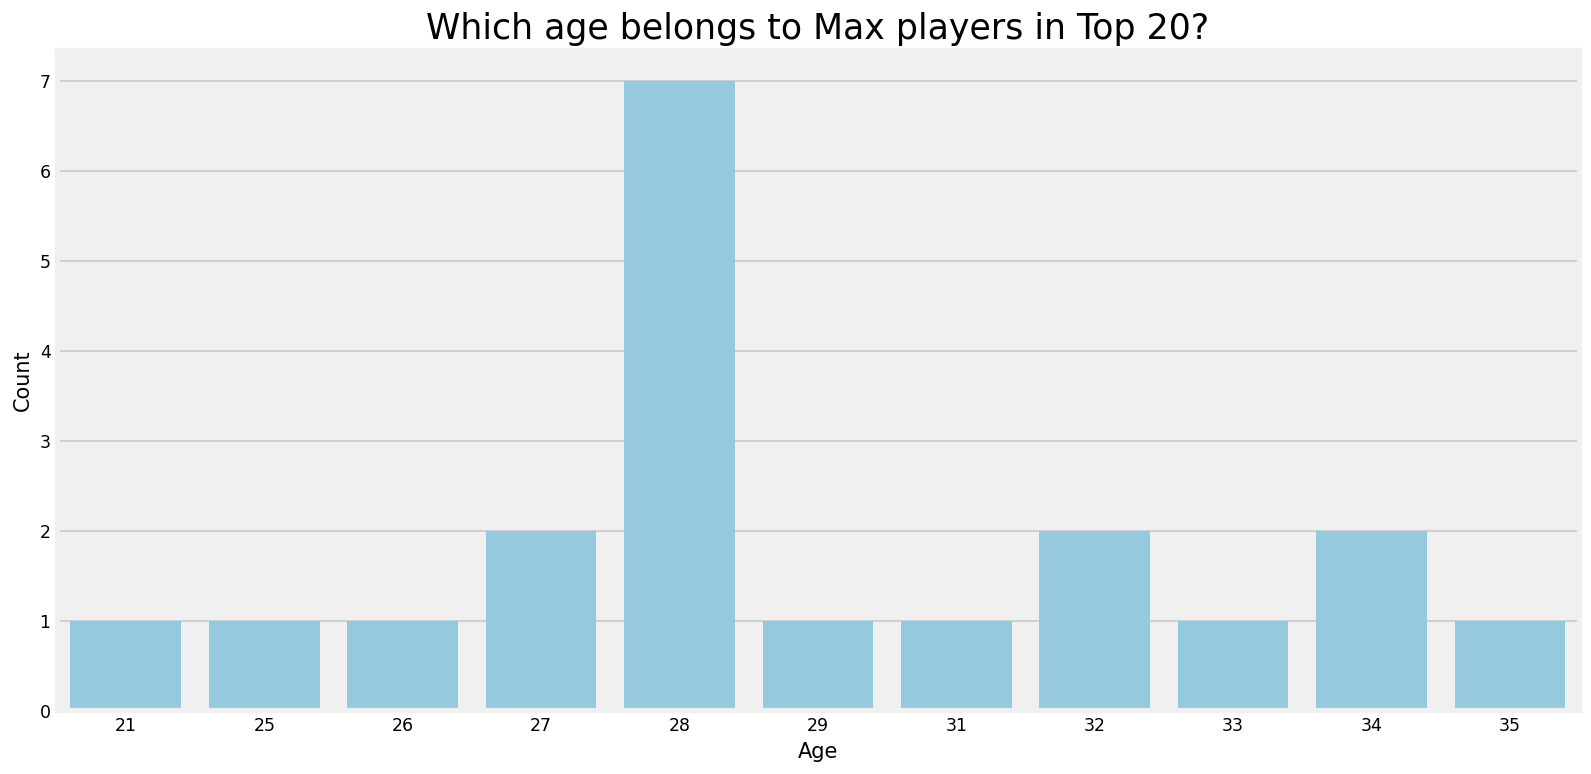

29.1


In [ ]:
plt.figure(figsize=(14,7),dpi=125)
sns.countplot('age',data=data.head(20),color='skyBlue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Which age belongs to Max players in Top 20?',fontsize = 20)
plt.show()

In [ ]:
player_features = ('movement_acceleration', 'mentality_aggression', 'movement_agility', 
                   'movement_balance', 'skill_ball_control', 'mentality_composure', 
                   'attacking_crossing', 'dribbling', 'skill_fk_accuracy', 
                   'attacking_finishing', 'goalkeeping_diving', 'goalkeeping_handling', 
                   'gk_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 
                   'attacking_heading_accuracy', 'mentality_interceptions', 'power_jumping', 
                   'skill_long_passing', 'power_long_shots', 'defending_marking', 'mentality_penalties')

ValueError: ignored

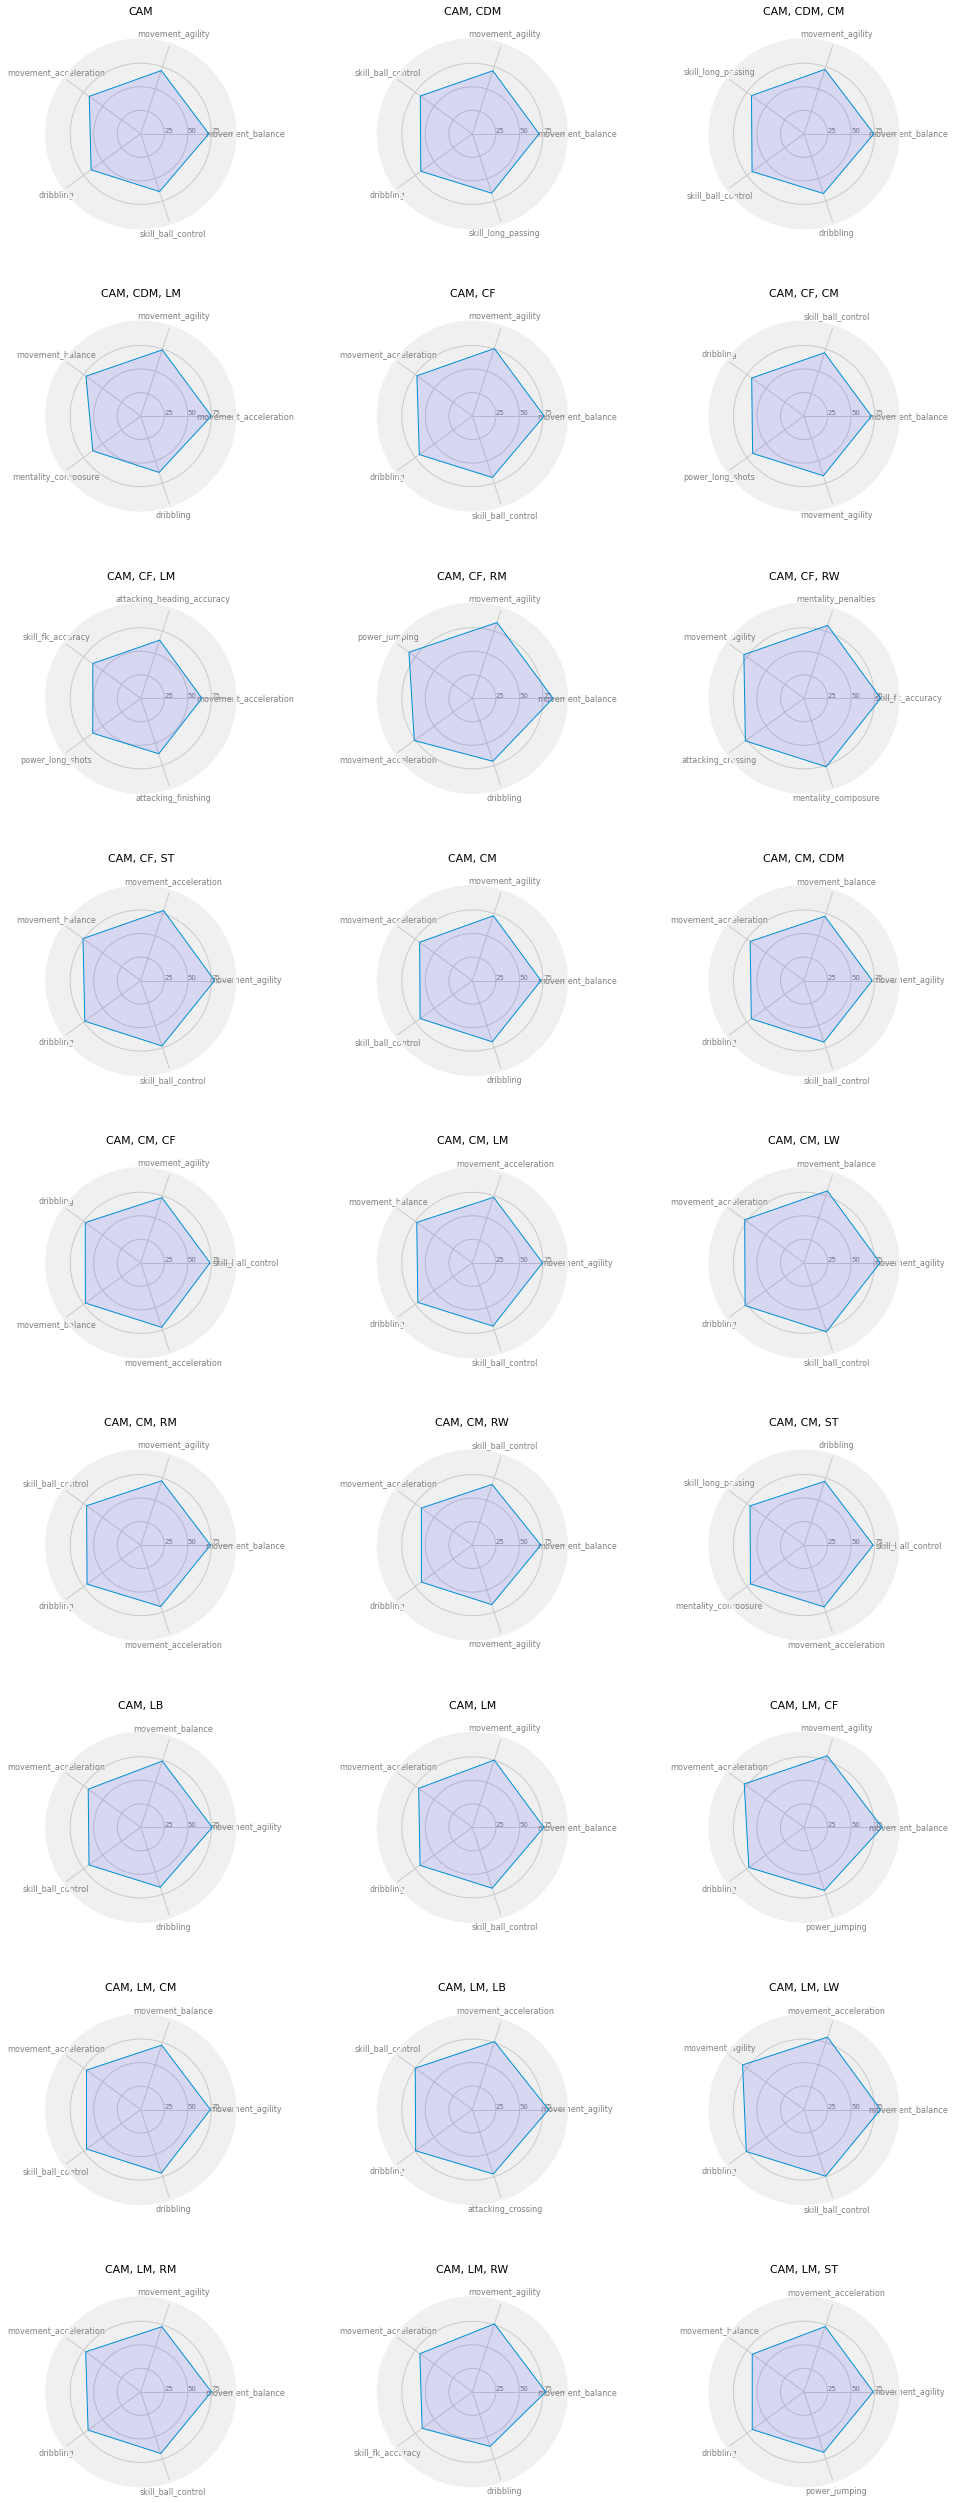

In [ ]:
from math import pi

idx = 1
plt.figure(figsize=(15,45))

for position_name, features in data.groupby(data['player_positions'])[player_features].mean().iterrows():
    
    top_features = dict(features.nlargest(5))
    
    categories=top_features.keys()
    N = len(categories)

    values = list(top_features.values())
    values += values[:1]

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(9, 3, idx, polar=True)

    plt.xticks(angles[:-1], categories, color='grey', size=8)

    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 